In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
def straight_line(x):
    return 5 * x + 8

In [4]:
n_samples = 150
x = pd.Series(np.arange(0, n_samples, dtype=float))
y = x.map(straight_line) + np.random.randn(n_samples) * 10
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.0,12.240137
1,1.0,17.926756
2,2.0,7.808880
3,3.0,25.587270
4,4.0,32.623164


In [5]:
df.corr()

,x,y
x,1.000000,0.998756
y,0.998756,1.000000


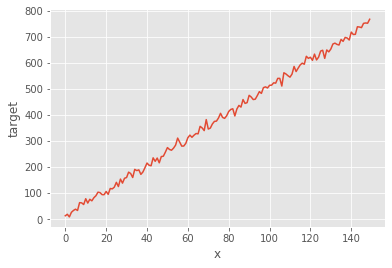

In [9]:
plt.plot(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('target')
plt.show()

In [20]:
# shuffling the dataset
indices = df.index.values
np.random.shuffle(indices)
df = df.iloc[indices]
df.head()

,x,y
53,14.0,81.605956
112,106.0,510.410819
36,2.0,7.808880
63,1.0,17.926756
71,142.0,709.094793


In [25]:
# splitting the dataset into Training and Test sets
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train
print(rows, train, test)

150 105 45


In [29]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

X_train = X[:train]
X_test = X[train:]
y_train = y[:train]
y_test = y[train:]

In [31]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [33]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[19:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:392.82	validation_1-rmse:405.343
[1]	validation_0-rmse:355.543	validation_1-rmse:366.148
[2]	validation_0-rmse:321.898	validation_1-rmse:331.154
[3]	validation_0-rmse:291.404	validation_1-rmse:299.274
[4]	validation_0-rmse:263.835	validation_1-rmse:269.706
[5]	validation_0-rmse:238.947	validation_1-rmse:243.389
[6]	validation_0-rmse:216.43	validation_1-rmse:219.753
[7]	validation_0-rmse:196.066	validation_1-rmse:198.736
[8]	validation_0-rmse:177.649	validation_1-rmse:180.323
[9]	validation_0-rmse:160.993	validation_1-rmse:163.759
[10]	validation_0-rmse:145.915	validation_1-rmse:148.858
[11]	validation_0-rmse:132.249	validation_1-rmse:134.236
[12]	validation_0-rmse:119.922	validation_1-rmse:121.387
[13]	validation_0-rmse:108.753	validation_1-rmse:110.229
[14]	validation_0-rmse:98.657	validation_1-rmse:100.34
[15]	validation_0-rmse:89.5221	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [35]:
eval_results = regressor.evals_result()
eval_results

{'validation_0': {'rmse': [392.820221,
   355.543243,
   321.898041,
   291.404297,
   263.835114,
   238.947021,
   216.429688,
   196.066452,
   177.649338,
   160.992783,
   145.91481,
   132.248886,
   119.922279,
   108.75325,
   98.65699,
   89.522118,
   81.250832,
   73.7537,
   66.970276,
   60.848103,
   55.307835,
   50.288429,
   45.757755,
   41.644947,
   37.935585,
   34.579163,
   31.535881,
   28.789049,
   26.304743,
   24.062799,
   22.032253,
   20.204454,
   18.557449,
   17.079107,
   15.744852,
   14.554222,
   13.483503,
   12.522362,
   11.668862,
   10.907067,
   10.225802,
   9.622509,
   9.088479,
   8.60985,
   8.196947,
   7.837201,
   7.51729,
   7.239275,
   6.99101,
   6.780638,
   6.597112,
   6.435071,
   6.293651,
   6.160165,
   6.054954,
   5.950004,
   5.852244,
   5.777307,
   5.704053,
   5.647257,
   5.598737,
   5.5362,
   5.484242,
   5.422013,
   5.380295,
   5.327195,
   5.280609,
   5.253267,
   5.22297,
   5.183919,
   5.164902,
   5.1357

In [37]:
training_rounds = range(len(eval_results['validation_0']['rmse']))
training_rounds

range(0, 100)

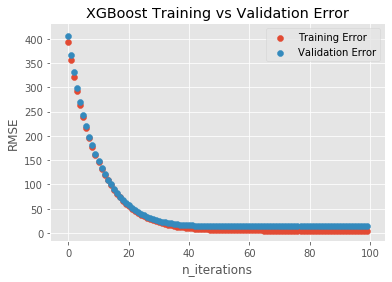

In [38]:
plt.scatter(x=training_rounds, y=eval_results['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_results['validation_1']['rmse'], label='Validation Error')
plt.xlabel('n_iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation Error')
plt.legend()
plt.show()

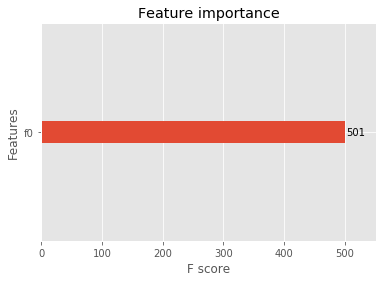

In [40]:
xgb.plot_importance(regressor)
plt.show()

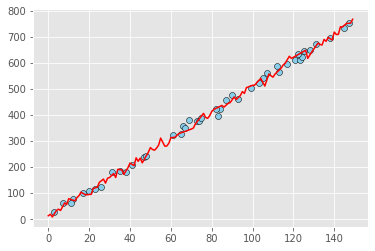

In [55]:
sorted_dataset = sorted(np.concatenate((X_train, y_train.reshape((-1, 1))), axis=1), 
                        key=lambda x: x[0])

plt.scatter(X_test, y_test, color='skyblue', edgecolor='k')
plt.plot([x[0] for x in sorted_dataset], 
         [x[1] for x in sorted_dataset], 
         color='red')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'mean squared error: {mse}')
print(f'root mean squared error: {mse ** 0.5}')

mean squared error: 221.5565357696959
root mean squared error: 14.884775301283385


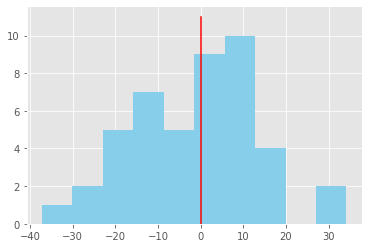

In [67]:
# histogram of residuals
residuals = y_test - y_pred
plt.hist(residuals, color='skyblue')
plt.plot([0,0], [0, 11], color='red')
plt.show()

In [82]:
under_estimations = (residuals > 0).sum()
over_estimations = (residuals < 0).sum()

print(f'under  estimations: {under_estimations}')
print(f'over   estimations: {over_estimations}')

under  estimations: 24
over   estimations: 21
